In [1]:
import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

from src import preprocessing as pre
from src import visualizations as viz
from src import shape


from mplsoccer import Pitch, VerticalPitch
from pathlib import Path
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import numpy as np



PITCH_LENGTH = 105
PITCH_WIDTH = 68
BACKGROUND_COLOR = '#F5F5F5'
PRIMARY_TEXT_COLOR = '#000000'
SECONDARY_TEXT_COLOR = '#757575'
PRIMARY_COLOR = '#649CCB'
HIGHLIGHT_COLOR = "#203490"

CMAP = LinearSegmentedColormap.from_list("Pearl Earring - 100 colors",
                                                           [BACKGROUND_COLOR, "#203490"], N=200)

# from matplotlib import font_manager, rcParams

# font_manager.fontManager.addfont("../assets/fonts/Manrope-Regular.ttf")
# font_manager.fontManager.addfont("../assets/fonts/Manrope-Bold.ttf")
# font_manager.fontManager.addfont("../assets/fonts/Manrope-Medium.ttf")

# rcParams["font.family"] = "Manrope"


In [2]:
match_id = 1886347
match_metadata = pre.load_metadata(match_id)
team_id = match_metadata['home_team']['id']

In [3]:
df = pre.prepare_team_tracking(match_id, team_id, is_home_team=True, 
                          include_phases_of_play = True,
                          include_match_time = True, 
                          include_in_possession = True,  
                          include_ball_zones = True,
                          exclude_goalkeeper=True)

/Users/martin/Documents/Projects/SkillCornerHackaton/analytics_cup_research/src/preprocessing.py:194: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(pick_gk_for_frame)


In [11]:
df.period_id.unique()

array([1, 2])

In [4]:
team_shape = shape.compute_average_team_shape_segment(df, top_n_players=10, include_metrics=True)

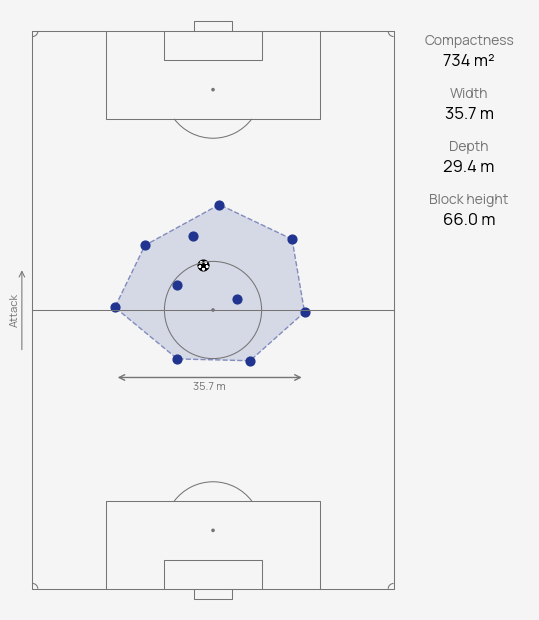

In [14]:
is_vertical = True
pitch,fig, ax_pitch = viz.plot_team_shape(team_shape, show_metrics=True, metric_column='width', vertical_pitch=is_vertical, in_possession=False)



NameError: name 'get_pitch' is not defined

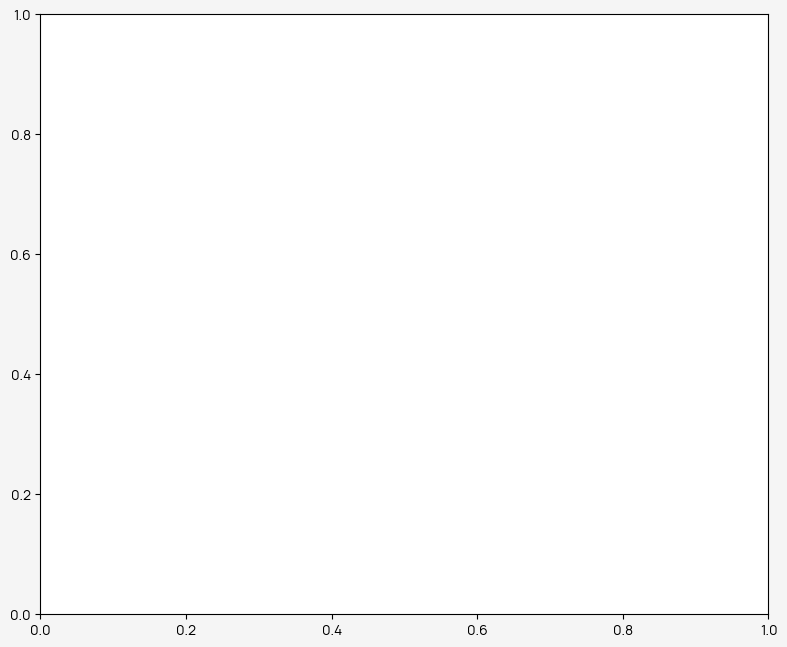

In [6]:
vertical = False

fig = plt.figure(figsize=(8,12))
fig.patch.set_facecolor(BACKGROUND_COLOR)

ax_pitch = fig.add_axes([0, .1,.91, .5])
pitch, ax_pitch = get_pitch(vertical,ax=ax_pitch)

values = {
        "width": 37.8,
        "depth": 29.4,
        "compactness": 402.1,
        "team_spread": 8.7,
        "line_height": 47.3,   # si aplica
        "block_height": 44.1,  # si aplica
      }
height_key = "line_height"

ordered_keys = ["width", "depth", "compactness", "team_spread", height_key]

def fmt(k, v):
    if v is None:
        return "—"
    if k == "compactness":
        return f"{float(v):.0f} m²"
    if k == "line_height" or k == "block_height":
        return f"{float(viz.height_from_own_goal(v)):.1f} m"
    return f"{float(v):.1f} m"

if vertical:
    ax_endnote = fig.add_axes([.7,.1,.15,.5], sharey=ax_pitch)
    lines = []
    index = 5
    for k in ordered_keys:
        val = values.get(k, None)
        label = LABELS[k]
        value = fmt(k, val)
        y = 10 * index
        ax_endnote.text(x=.5, y=y, s=label, fontsize=10, color=SECONDARY_TEXT_COLOR, ha='center')
        ax_endnote.text(x=.5, y=y-4, s=value, fontsize=12, color=PRIMARY_TEXT_COLOR, ha='center')
        index -= 1
else:
    ax_endnote = fig.add_axes([.91,.17,.15,.36], sharey=ax_pitch)
    lines = []
    index = 2
    for k in ordered_keys:
        val = values.get(k, None)
        label = LABELS[k]
        value = fmt(k, val)
        y = 10 * index
        ax_endnote.text(x=.5, y=y, s=label, fontsize=10, color=SECONDARY_TEXT_COLOR, ha='center')
        ax_endnote.text(x=.5, y=y-4, s=value, fontsize=12, color=PRIMARY_TEXT_COLOR, ha='center')
        index -= 1

ax_endnote.axis('off')

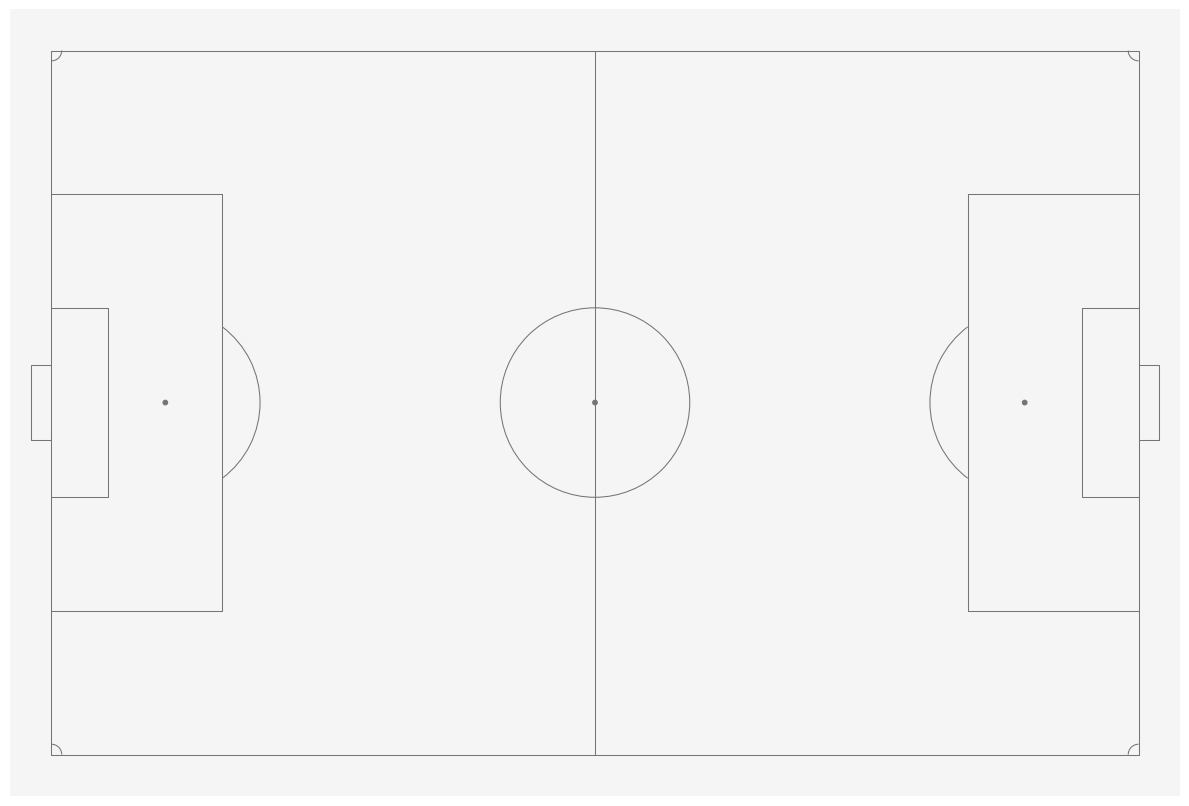

In [ ]:
pitch = Pitch(pitch_type='skillcorner',
                    line_zorder=10,
                    line_color=SECONDARY_TEXT_COLOR,
                    half=False,
                    pitch_color=BACKGROUND_COLOR,
                    linewidth=.75,
                    corner_arcs=True,
                    goal_type='box',
                    pitch_length=PITCH_LENGTH, pitch_width=PITCH_WIDTH)

fig, ax = pitch.draw(figsize=(12, 10))